In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

O:\anaconda3\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
convert_dic={'A':'A1', 'B':'A2', 'C':'A3', 'D':'A4', 'E':'A5', 'F':'A6', 'G':'A7', 'H':'H1', 'I':'H2', 'J':'H3', 'K':'H4', 'L':'H5', 'a':'H6', 'b':'H7'}
convert_dic2 = {v: k for k, v in convert_dic.items()}
convert_dic2

{'A1': 'A',
 'A2': 'B',
 'A3': 'C',
 'A4': 'D',
 'A5': 'E',
 'A6': 'F',
 'A7': 'G',
 'H1': 'H',
 'H2': 'I',
 'H3': 'J',
 'H4': 'K',
 'H5': 'L',
 'H6': 'a',
 'H7': 'b'}

In [31]:
interacting_pairs= ['A1_H2_1', 'A1_A4_1', 'A1_A7_1', 'A2_H3_0', 'A2_A3_1', 'A2_A1_2', 'A3_H4_1', 'A3_A2_1', 'A3_A4_0', 'A4_A3_0', 'A4_H4_1', 'A5_H6_1', 'A5_A6_0', 'A6_H6_0', 'A6_A7_0', 'A6_A5_0', 'A7_H1_1', 'A7_A1_1', 'A7_A6_0', 'H1_H5_0', 'H1_A7_1', 'H1_H2_0', 'H1_H6_0', 'H2_H5_0', 'H2_H1_0', 'H2_H4_1', 'H2_A1_1', 'H3_H3_0', 'H3_H4_0', 'H3_A2_0', 'H4_H5_0', 'H4_A3_1', 'H4_H2_1', 'H4_A4_1', 'H5_H1_0', 'H5_H6_0', 'H5_A4_0', 'H6_A5_1', 'H6_H5_0', 'H6_H1_0', 'H7_A7_0', 'H7_H7_0', 'H7_H1_0', 'H7_A5_2']
#interacting_pairs

In [32]:
df = pd.read_csv('TMscores.txt',names=['pair','obs_contact','tmscore'])
df['rank'] = df['pair'].apply(lambda x: x.split('_')[-1])
df['pair'] = df['pair'].apply(lambda x: x[:-2])
df = df[df['pair'].str.contains('5LE5')]

print ('We have',len(df[df['obs_contact']>9])/5, 'interacting pairs')

We have 34.0 interacting pairs


In [33]:
everything=[]
for ip in interacting_pairs:
    check=False
    chain1=convert_dic2[ip[:2]]
    chain2=convert_dic2[ip[3:5]]
    rank=ip[-1]
    for _,row in df.iterrows():
        if rank==row['rank']:
            if row['pair'][5]==chain1 and row['pair'][12]==chain2:
                #print (list(row))
                everything.append(list(row))
                check=True
            elif row['pair'][5]==chain2 and row['pair'][12]==chain1:
                #print (list(row))
                everything.append(list(row))
                check=True
    if check==False:
        #print (['5LE5_%s_5LE5_%s'%(chain1,chain2),0,None,ip[-1]])
        everything.append(['5LE5_%s_5LE5_%s'%(chain1,chain2),0,None,ip[-1]])  

tuple_list = [tuple(sublist) for sublist in everything]
unique_tuples = set(tuple_list)
everything = [list(tpl) for tpl in unique_tuples]
#for i in sorted(everything, key=lambda x:x[0]): print (i) 
print (len(everything),'found interacting pairs')
print (len(list(filter(lambda x: x[1]==0,everything))),'= False Positives')
sorted(everything, key=lambda x:x[0])

28 found interacting pairs
2 = False Positives


[['5LE5_A_5LE5_B', 101, 0.971, '2'],
 ['5LE5_A_5LE5_D', 0, None, '1'],
 ['5LE5_A_5LE5_G', 98, 0.974, '1'],
 ['5LE5_A_5LE5_I', 18, 0.984, '1'],
 ['5LE5_B_5LE5_C', 97, 0.967, '1'],
 ['5LE5_B_5LE5_J', 20, 0.961, '0'],
 ['5LE5_C_5LE5_D', 112, 0.972, '0'],
 ['5LE5_C_5LE5_K', 17, 0.936, '1'],
 ['5LE5_D_5LE5_K', 17, 0.978, '1'],
 ['5LE5_D_5LE5_L', 25, 0.979, '0'],
 ['5LE5_E_5LE5_F', 93, 0.955, '0'],
 ['5LE5_E_5LE5_a', 29, 0.961, '1'],
 ['5LE5_F_5LE5_G', 94, 0.962, '0'],
 ['5LE5_F_5LE5_a', 19, 0.975, '0'],
 ['5LE5_G_5LE5_H', 24, 0.941, '1'],
 ['5LE5_G_5LE5_b', 20, 0.979, '0'],
 ['5LE5_H_5LE5_I', 87, 0.977, '0'],
 ['5LE5_H_5LE5_L', 67, 0.977, '0'],
 ['5LE5_H_5LE5_a', 54, 0.975, '0'],
 ['5LE5_H_5LE5_b', 29, 0.972, '0'],
 ['5LE5_J_5LE5_J', 54, 0.507, '0'],
 ['5LE5_J_5LE5_K', 38, 0.974, '0'],
 ['5LE5_K_5LE5_I', 48, 0.992, '1'],
 ['5LE5_K_5LE5_L', 32, 0.991, '0'],
 ['5LE5_L_5LE5_I', 54, 0.996, '0'],
 ['5LE5_L_5LE5_a', 44, 0.991, '0'],
 ['5LE5_b_5LE5_E', 0, None, '2'],
 ['5LE5_b_5LE5_b', 72, 0.986, 

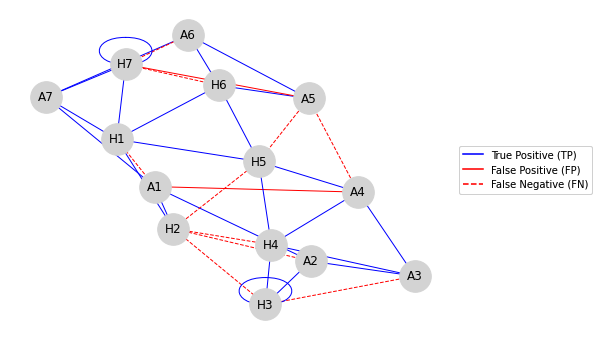

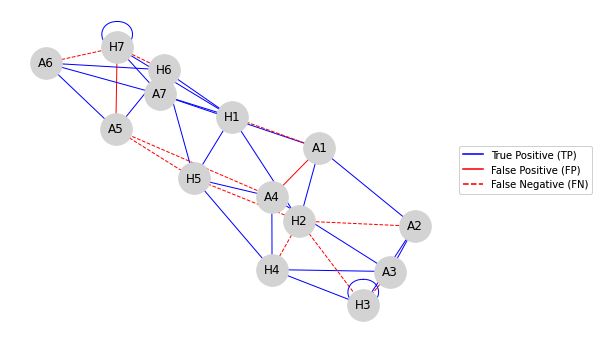

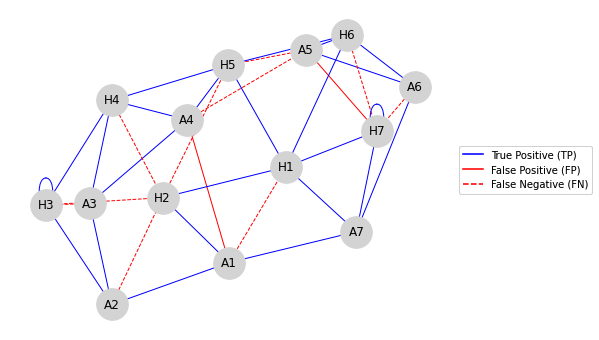

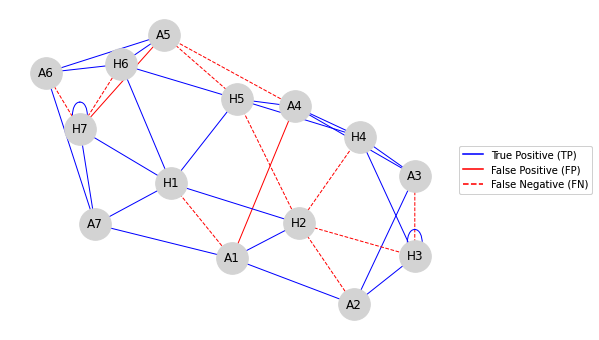

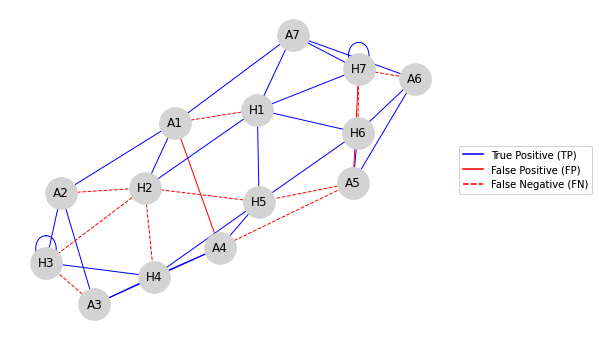

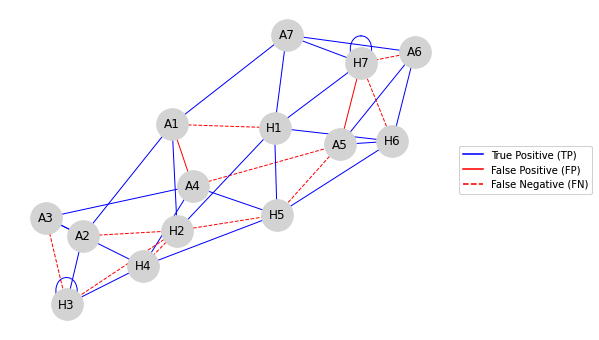

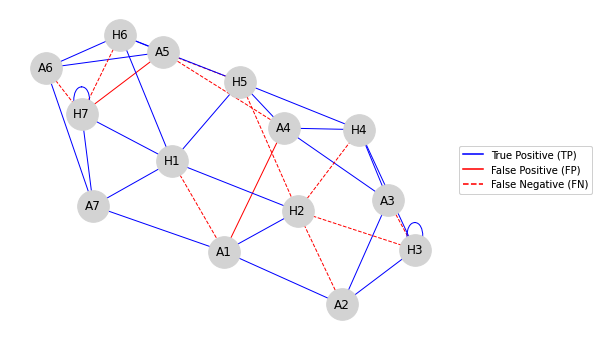

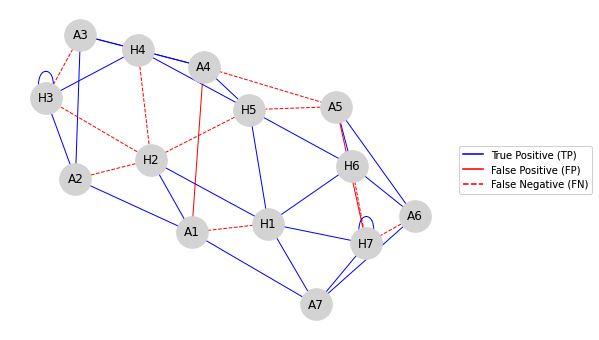

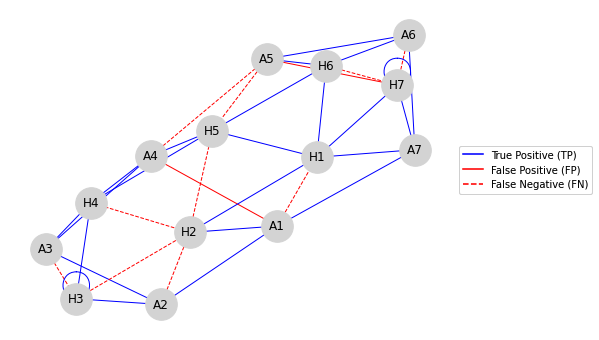

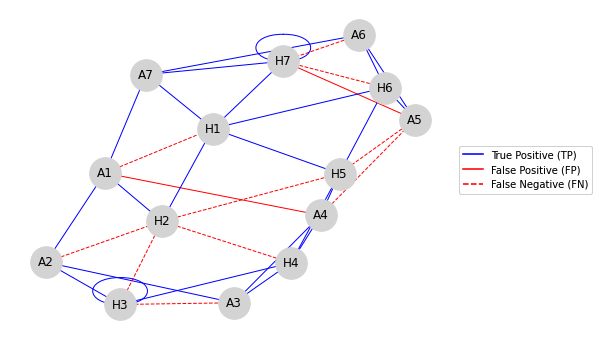

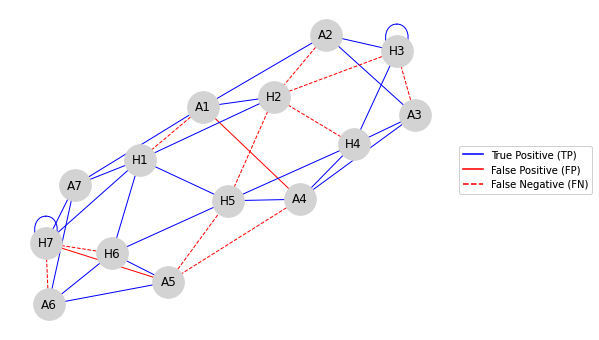

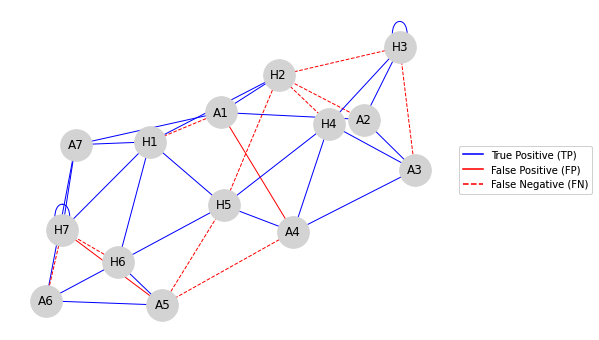

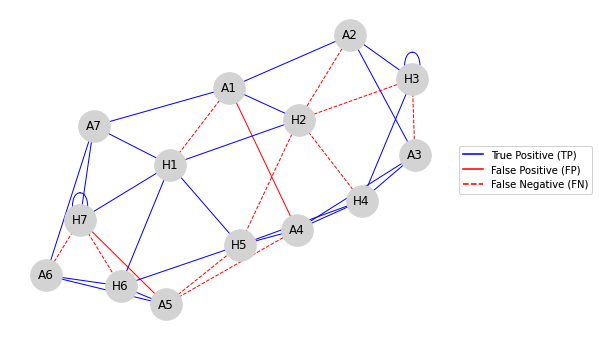

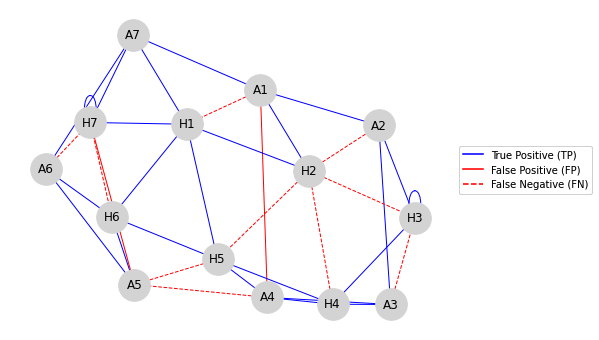

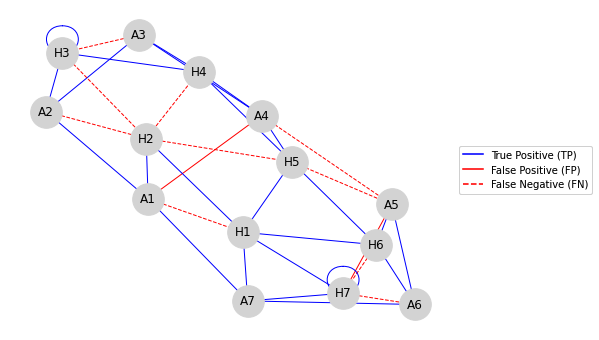

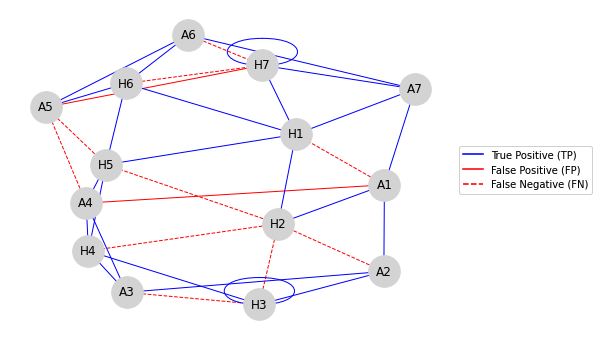

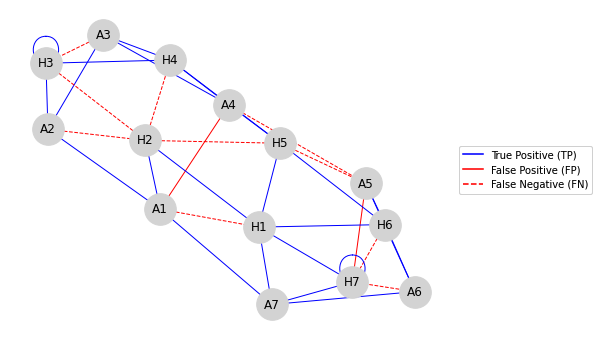

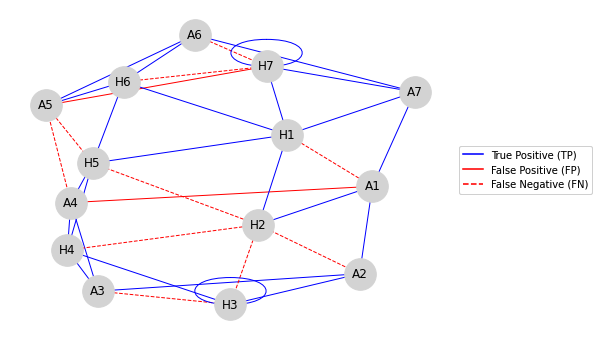

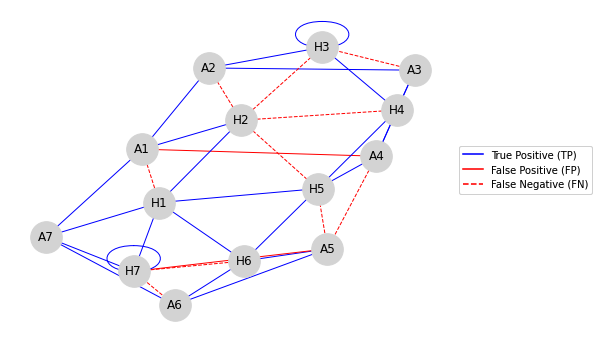

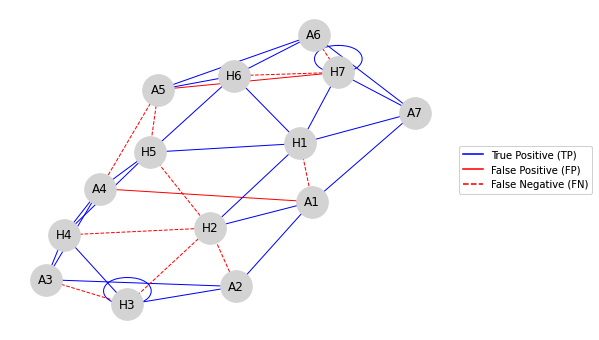

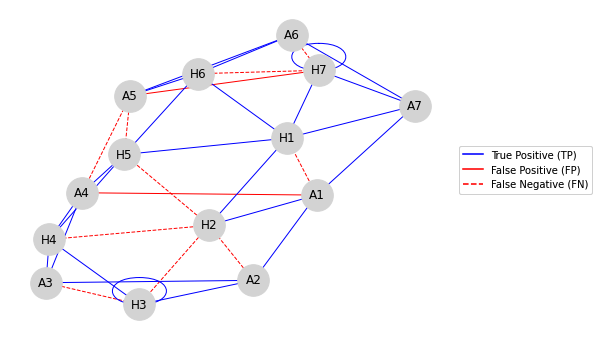

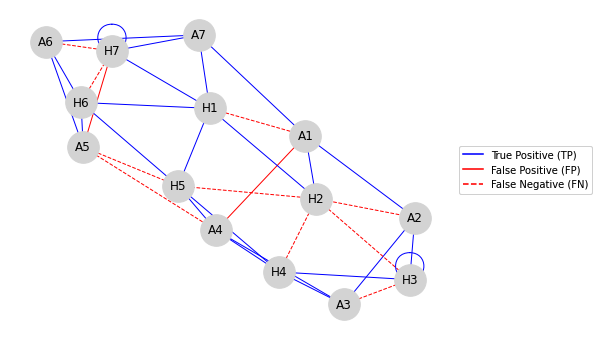

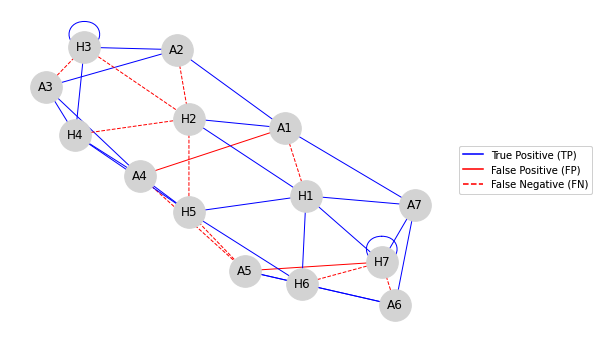

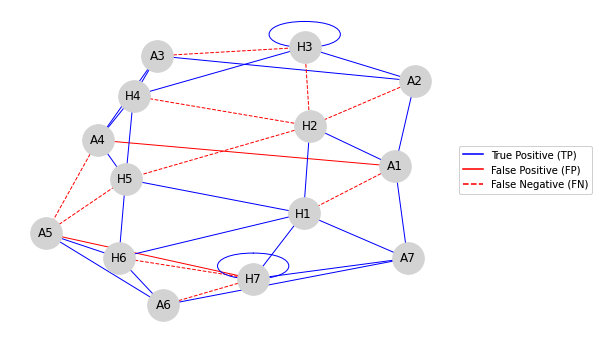

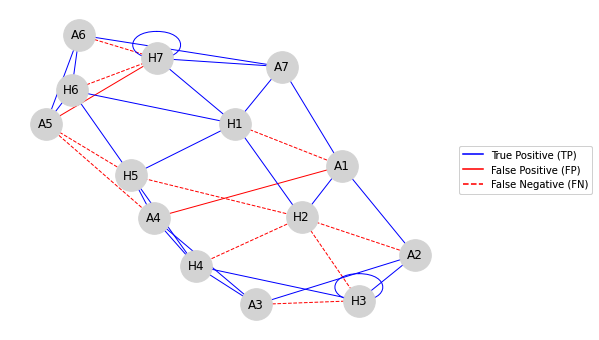

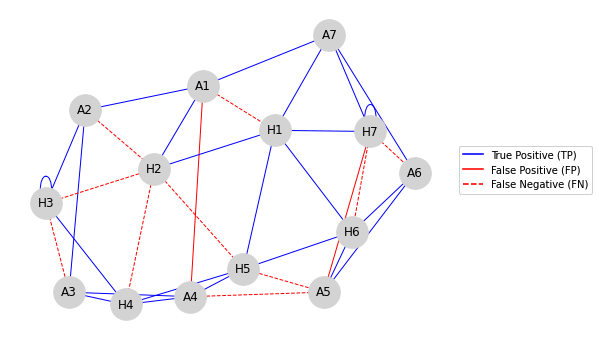

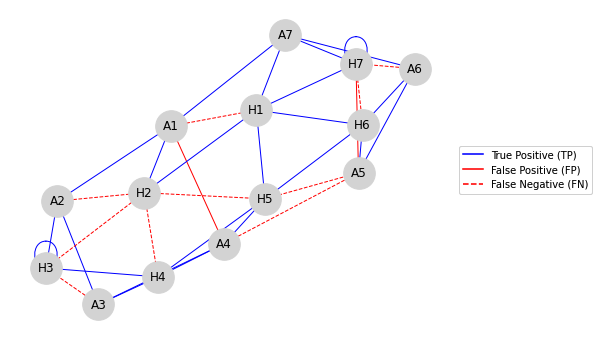

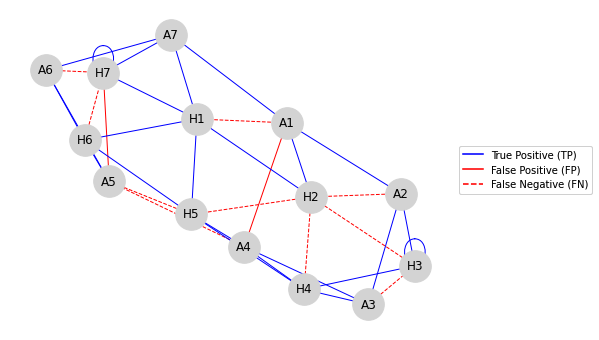

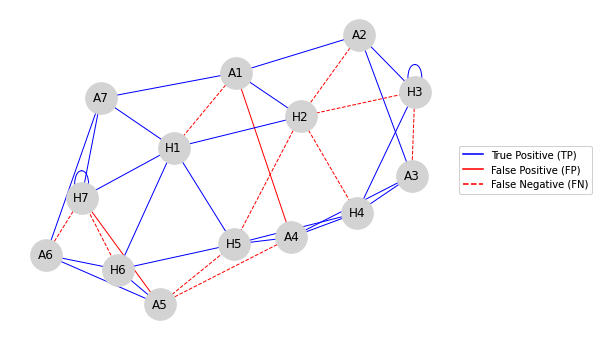

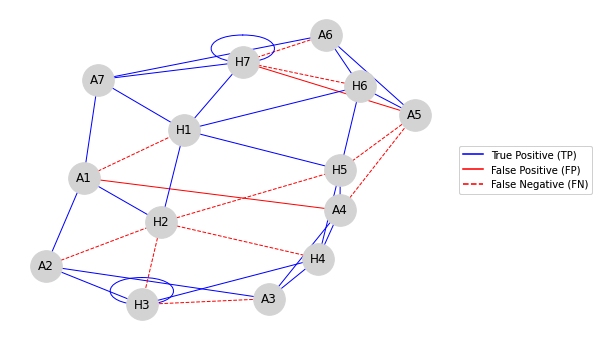

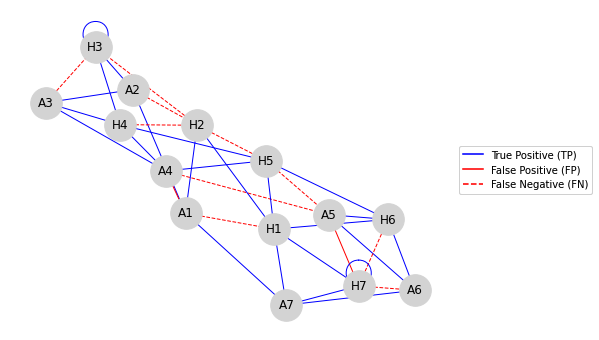

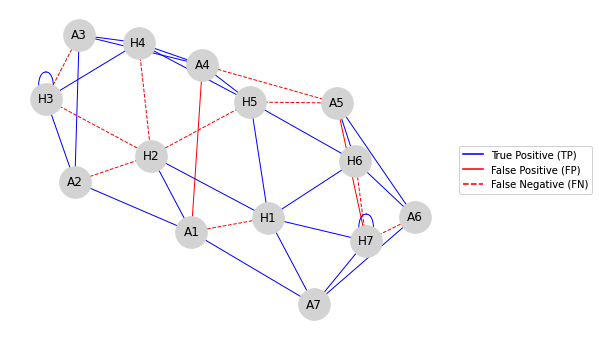

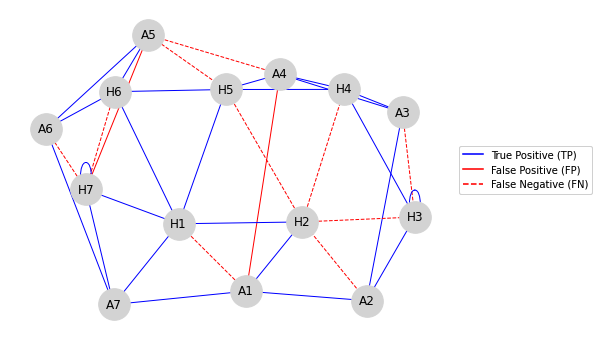

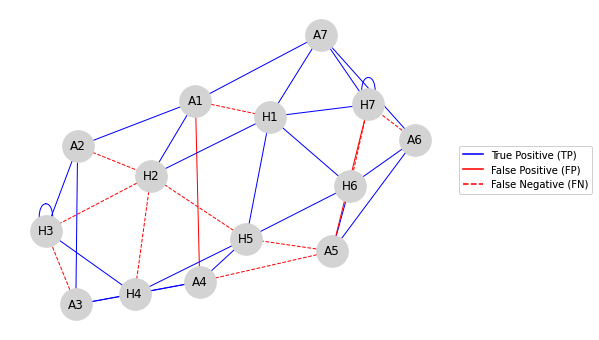

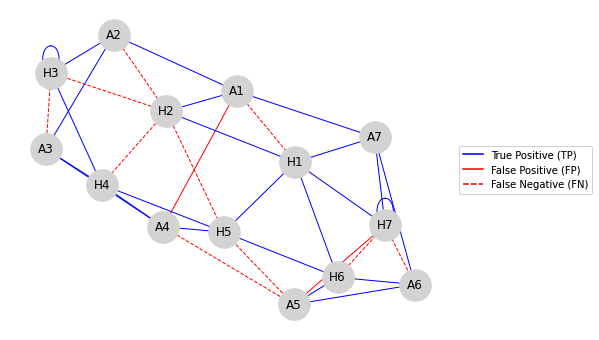

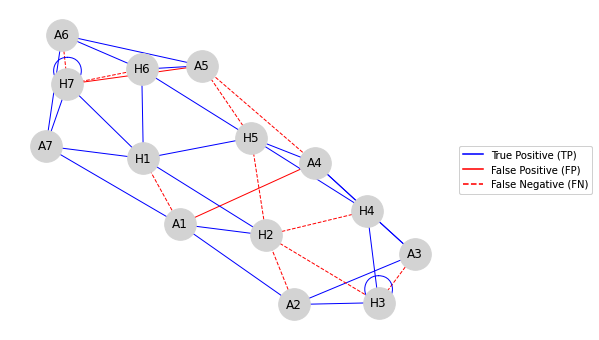

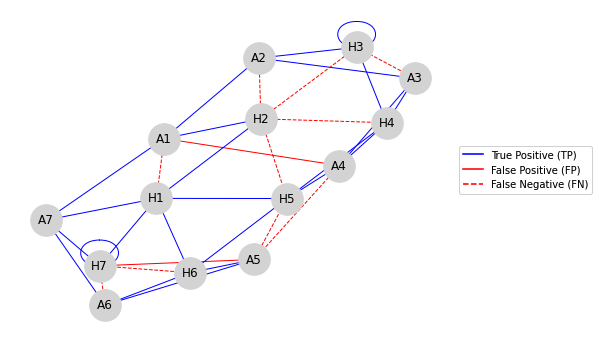

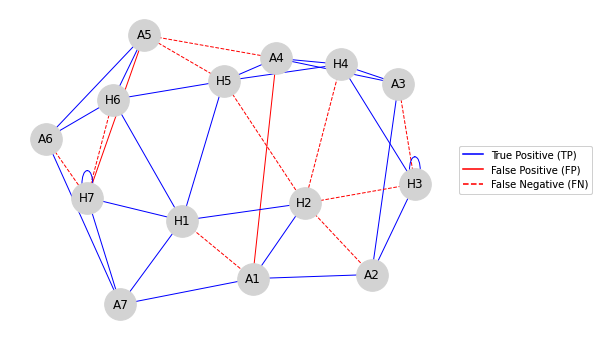

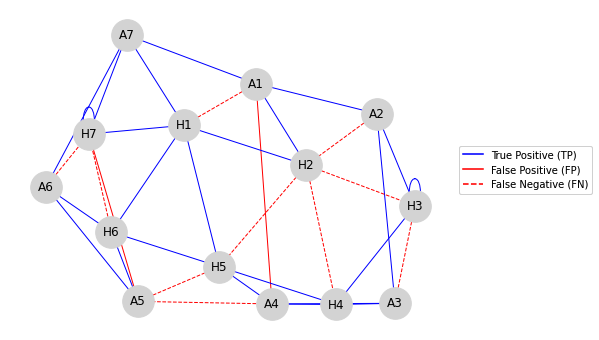

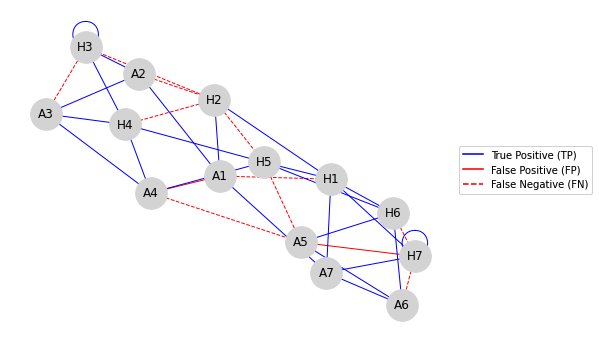

In [53]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the nodes and edges
nodes = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7']
predicted_edges = ['A1_A2', 'A1_A4', 'A1_A7', 'A1_H2', 'A2_A3', 'A2_H3', 'A3_A4', 'A3_H4', 'A4_H4', 'A4_H5',
                   'A5_A6', 'A5_H6', 'A6_A7', 'A6_H6', 'A7_H1', 'A7_H7', 'H1_H2', 'H1_H5', 'H1_H6', 'H1_H7',
                   'H3_H3', 'H3_H4', 'H4_H2', 'H4_H5', 'H5_H2', 'H5_H6', 'H7_A5', 'H7_H7']
actual_edges = ['A3_H4', 'H3_H3', 'H1_H7', 'A6_A7', 'A2_A3', 'A3_H3', 'A3_A4', 'H4_H5', 'A6_H7', 'A5_H6',
                'H5_H6', 'A2_H3', 'H1_H5', 'A1_H2', 'A2_H2', 'A5_A6', 'H1_H2', 'H1_H6', 'A1_A7', 'A1_H1',
                'H7_H7', 'A7_H7', 'A4_H5', 'H3_H4', 'A7_H1', 'A1_A2', 'H6_H7', 'H2_H3', 'A6_H6', 'H2_H5',
                'A4_H4', 'A5_H5', 'A4_A5', 'H2_H4']

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(nodes)

# Add predicted edges as red lines
for edge in predicted_edges:
    if edge in actual_edges:
        G.add_edge(edge.split('_')[0], edge.split('_')[1], color='blue')  # True positive (blue line)
    else:
        G.add_edge(edge.split('_')[0], edge.split('_')[1], color='red')  # False positive (red line)

# Add actual edges as dashed red lines (false negatives)
for edge in actual_edges:
    if edge not in predicted_edges:
        G.add_edge(edge.split('_')[0], edge.split('_')[1], color='red', linestyle='dashed')  # False negative (dashed red line)

# Draw the graph using circular layout
pos = nx.spring_layout(G)
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]
styles = [G[u][v]['linestyle'] if 'linestyle' in G[u][v] else 'solid' for u, v in edges]

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=1000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color=colors, style=styles)

# Create legend
true_positive = plt.Line2D([], [], color='blue', linestyle='-', label='True Positive (TP)')
false_positive = plt.Line2D([], [], color='red', linestyle='-', label='False Positive (FP)')
false_negative = plt.Line2D([], [], color='red', linestyle='dashed', label='False Negative (FN)')

# Move the legend outside of the graph
legend = plt.legend(handles=[true_positive, false_positive, false_negative], loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().add_artist(legend)

plt.axis('off')
plt.show()